In [1]:
from load_data import MyOwnDataset
import torch
import torch.nn as nn
from torch.nn import Linear, ConvTranspose2d, MSELoss, CrossEntropyLoss
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, GAE
from torch_geometric.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import image
import cv2

In [2]:
print("Loading data....")
dataset = MyOwnDataset(root = "data/POLY/")
train_dataset = dataset[:4500]
test_dataset = dataset[4500:5000]
image_train_dataset = []
image_test_dataset = []
for i in range (4500):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/4500" %i)
    image_train_dataset.append(image)
for i in range (4500,5000):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/500" %(i-4500))
    image_test_dataset.append(image)

Loading data....
0/4500
1/4500
2/4500
3/4500
4/4500
5/4500
6/4500
7/4500
8/4500
9/4500
10/4500
11/4500
12/4500
13/4500
14/4500
15/4500
16/4500
17/4500
18/4500
19/4500
20/4500
21/4500
22/4500
23/4500
24/4500
25/4500
26/4500
27/4500
28/4500
29/4500
30/4500
31/4500
32/4500
33/4500
34/4500
35/4500
36/4500
37/4500
38/4500
39/4500
40/4500
41/4500
42/4500
43/4500
44/4500
45/4500
46/4500
47/4500
48/4500
49/4500
50/4500
51/4500
52/4500
53/4500
54/4500
55/4500
56/4500
57/4500
58/4500
59/4500
60/4500
61/4500
62/4500
63/4500
64/4500
65/4500
66/4500
67/4500
68/4500
69/4500
70/4500
71/4500
72/4500
73/4500
74/4500
75/4500
76/4500
77/4500
78/4500
79/4500
80/4500
81/4500
82/4500
83/4500
84/4500
85/4500
86/4500
87/4500
88/4500
89/4500
90/4500
91/4500
92/4500
93/4500
94/4500
95/4500
96/4500
97/4500
98/4500
99/4500
100/4500
101/4500
102/4500
103/4500
104/4500
105/4500
106/4500
107/4500
108/4500
109/4500
110/4500
111/4500
112/4500
113/4500
114/4500
115/4500
116/4500
117/4500
118/4500
119/4500
120/4500
121/

1139/4500
1140/4500
1141/4500
1142/4500
1143/4500
1144/4500
1145/4500
1146/4500
1147/4500
1148/4500
1149/4500
1150/4500
1151/4500
1152/4500
1153/4500
1154/4500
1155/4500
1156/4500
1157/4500
1158/4500
1159/4500
1160/4500
1161/4500
1162/4500
1163/4500
1164/4500
1165/4500
1166/4500
1167/4500
1168/4500
1169/4500
1170/4500
1171/4500
1172/4500
1173/4500
1174/4500
1175/4500
1176/4500
1177/4500
1178/4500
1179/4500
1180/4500
1181/4500
1182/4500
1183/4500
1184/4500
1185/4500
1186/4500
1187/4500
1188/4500
1189/4500
1190/4500
1191/4500
1192/4500
1193/4500
1194/4500
1195/4500
1196/4500
1197/4500
1198/4500
1199/4500
1200/4500
1201/4500
1202/4500
1203/4500
1204/4500
1205/4500
1206/4500
1207/4500
1208/4500
1209/4500
1210/4500
1211/4500
1212/4500
1213/4500
1214/4500
1215/4500
1216/4500
1217/4500
1218/4500
1219/4500
1220/4500
1221/4500
1222/4500
1223/4500
1224/4500
1225/4500
1226/4500
1227/4500
1228/4500
1229/4500
1230/4500
1231/4500
1232/4500
1233/4500
1234/4500
1235/4500
1236/4500
1237/4500
1238/4500


1959/4500
1960/4500
1961/4500
1962/4500
1963/4500
1964/4500
1965/4500
1966/4500
1967/4500
1968/4500
1969/4500
1970/4500
1971/4500
1972/4500
1973/4500
1974/4500
1975/4500
1976/4500
1977/4500
1978/4500
1979/4500
1980/4500
1981/4500
1982/4500
1983/4500
1984/4500
1985/4500
1986/4500
1987/4500
1988/4500
1989/4500
1990/4500
1991/4500
1992/4500
1993/4500
1994/4500
1995/4500
1996/4500
1997/4500
1998/4500
1999/4500
2000/4500
2001/4500
2002/4500
2003/4500
2004/4500
2005/4500
2006/4500
2007/4500
2008/4500
2009/4500
2010/4500
2011/4500
2012/4500
2013/4500
2014/4500
2015/4500
2016/4500
2017/4500
2018/4500
2019/4500
2020/4500
2021/4500
2022/4500
2023/4500
2024/4500
2025/4500
2026/4500
2027/4500
2028/4500
2029/4500
2030/4500
2031/4500
2032/4500
2033/4500
2034/4500
2035/4500
2036/4500
2037/4500
2038/4500
2039/4500
2040/4500
2041/4500
2042/4500
2043/4500
2044/4500
2045/4500
2046/4500
2047/4500
2048/4500
2049/4500
2050/4500
2051/4500
2052/4500
2053/4500
2054/4500
2055/4500
2056/4500
2057/4500
2058/4500


2963/4500
2964/4500
2965/4500
2966/4500
2967/4500
2968/4500
2969/4500
2970/4500
2971/4500
2972/4500
2973/4500
2974/4500
2975/4500
2976/4500
2977/4500
2978/4500
2979/4500
2980/4500
2981/4500
2982/4500
2983/4500
2984/4500
2985/4500
2986/4500
2987/4500
2988/4500
2989/4500
2990/4500
2991/4500
2992/4500
2993/4500
2994/4500
2995/4500
2996/4500
2997/4500
2998/4500
2999/4500
3000/4500
3001/4500
3002/4500
3003/4500
3004/4500
3005/4500
3006/4500
3007/4500
3008/4500
3009/4500
3010/4500
3011/4500
3012/4500
3013/4500
3014/4500
3015/4500
3016/4500
3017/4500
3018/4500
3019/4500
3020/4500
3021/4500
3022/4500
3023/4500
3024/4500
3025/4500
3026/4500
3027/4500
3028/4500
3029/4500
3030/4500
3031/4500
3032/4500
3033/4500
3034/4500
3035/4500
3036/4500
3037/4500
3038/4500
3039/4500
3040/4500
3041/4500
3042/4500
3043/4500
3044/4500
3045/4500
3046/4500
3047/4500
3048/4500
3049/4500
3050/4500
3051/4500
3052/4500
3053/4500
3054/4500
3055/4500
3056/4500
3057/4500
3058/4500
3059/4500
3060/4500
3061/4500
3062/4500


3924/4500
3925/4500
3926/4500
3927/4500
3928/4500
3929/4500
3930/4500
3931/4500
3932/4500
3933/4500
3934/4500
3935/4500
3936/4500
3937/4500
3938/4500
3939/4500
3940/4500
3941/4500
3942/4500
3943/4500
3944/4500
3945/4500
3946/4500
3947/4500
3948/4500
3949/4500
3950/4500
3951/4500
3952/4500
3953/4500
3954/4500
3955/4500
3956/4500
3957/4500
3958/4500
3959/4500
3960/4500
3961/4500
3962/4500
3963/4500
3964/4500
3965/4500
3966/4500
3967/4500
3968/4500
3969/4500
3970/4500
3971/4500
3972/4500
3973/4500
3974/4500
3975/4500
3976/4500
3977/4500
3978/4500
3979/4500
3980/4500
3981/4500
3982/4500
3983/4500
3984/4500
3985/4500
3986/4500
3987/4500
3988/4500
3989/4500
3990/4500
3991/4500
3992/4500
3993/4500
3994/4500
3995/4500
3996/4500
3997/4500
3998/4500
3999/4500
4000/4500
4001/4500
4002/4500
4003/4500
4004/4500
4005/4500
4006/4500
4007/4500
4008/4500
4009/4500
4010/4500
4011/4500
4012/4500
4013/4500
4014/4500
4015/4500
4016/4500
4017/4500
4018/4500
4019/4500
4020/4500
4021/4500
4022/4500
4023/4500


417/500
418/500
419/500
420/500
421/500
422/500
423/500
424/500
425/500
426/500
427/500
428/500
429/500
430/500
431/500
432/500
433/500
434/500
435/500
436/500
437/500
438/500
439/500
440/500
441/500
442/500
443/500
444/500
445/500
446/500
447/500
448/500
449/500
450/500
451/500
452/500
453/500
454/500
455/500
456/500
457/500
458/500
459/500
460/500
461/500
462/500
463/500
464/500
465/500
466/500
467/500
468/500
469/500
470/500
471/500
472/500
473/500
474/500
475/500
476/500
477/500
478/500
479/500
480/500
481/500
482/500
483/500
484/500
485/500
486/500
487/500
488/500
489/500
490/500
491/500
492/500
493/500
494/500
495/500
496/500
497/500
498/500
499/500


In [3]:
print("Training dataset length: ", len(train_dataset), "\nTesting dataset length: ", len(test_dataset))
print("Training images loaded:", len(image_train_dataset), "\nTesting images loaded:", len(image_test_dataset))
print()

Training dataset length:  4500 
Testing dataset length:  500
Training images loaded: 4500 
Testing images loaded: 500



In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
train_images_loader = torch.utils.data.DataLoader(
    image_train_dataset, batch_size = 64
    )
test_images_loader = torch.utils.data.DataLoader(
    image_test_dataset, batch_size = 64
    )
print(f'Number of training batches created: {len(train_loader)}')

Number of training batches created: 71


In [5]:
with torch.no_grad():
    for batch_images in test_images_loader:
        batch_images = batch_images
        break
        
with torch.no_grad():
    plt.figure(figsize=(10, 4))
    for index in range(10):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(batch_images[index].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

NameError: name 'number' is not defined

<Figure size 720x288 with 0 Axes>

In [ ]:
from load_data import MyOwnDataset
import torch
import numpy as np
from skimage.draw import polygon
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.lines as mlines
import string as str
import pandas as pd
from sklearn.neighbors import KernelDensity
import cv2



def groundtruth(filename):

    def parsepolygonfile(filename):

        Polygons = []
        fileHandle = open(filename, "r")
        ListOfLines = fileHandle.readlines()
        Header = ListOfLines[0]
        NPolys = int(Header)

        def readblock(ListOfLines,StartLine):
            Polygon = []
            BlockOfLines = ListOfLines[StartLine:]

            BlockHeader = BlockOfLines[0]
            NPoints,Class = BlockHeader.split(' ')
            NPoints = int(NPoints)
            Class = int(Class)

            thisBlockOfLines = BlockOfLines[1:NPoints+1]

            ind=0
            for line in thisBlockOfLines:
                Unknown,NConn,N1,N2,x,y = line.split(' ')
                point = float(x)*32, float(y)*32
                Polygon.append(point)

                ind+=1
            Polygon = np.asarray(Polygon)
            return Polygon, Class

        for i in range(NPolys):
            P,C=readblock(ListOfLines,(i*6)+1)
            Polygons.append({'Poly':P})

        return Polygons

    def drawpolyintoemptycanvas(poly):

        img = np.zeros((64,64), dtype=float)
        R = []
        C = []
        for i in range(0,len(poly)):
            R.append(32 + poly[i,1])
            C.append(32 + poly[i,0])

        rr, cc = polygon(R, C, (64,64))
        img[rr, cc] = 1

        return img

    Polygons_permuted=parsepolygonfile(filename) # New polys:
    Polys=[P['Poly'] for P in Polygons_permuted]

    a = []

    for P in Polys:
        q = drawpolyintoemptycanvas(P)
        q = q.reshape(1,64,64)
        a.append(q)

    a = np.array(a)
    #print(len(a))
    a = torch.from_numpy(a)
    #print(a.shape)

    return a





def load_GT_data():

    print('loading data')

    g_list = groundtruth('data/POLY/shuffle_POLY.txt')
    dataset = MyOwnDataset(root = "data/POLY/")
   

    train_dataset = dataset[:4500]
    test_dataset = dataset[4500:]
    print("Training dataset length: ", len(train_dataset), "\nTesting dataset length: ", len(test_dataset))
    print()
    data = dataset[0]
    print("Regular dataset")
    print()
    print("X and Y positions of the nodes: \n", data['x'])
    print()
    print("Edge indices: \n", data['edge_index'])
    print()
    print("Class of the graph: \n", data['y'])
    print()
    return g_list

    print(g_list.size())

if __name__ == "__main__":
    g_list = load_GT_data()
    print(g_list.size())

   
    img = g_list[0].reshape(64,64)
    plt.imshow(img, cmap='gray')
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.show()
#     plt.savefig('data/images/image_%d.png'%i,transparent = True,bbox_inches='tight',pad_inches = 0, dpi = 13.4)

In [6]:
class UnFlatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), 40, 6, 6)

class Encoder(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(Encoder, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 64)
        self.conv3 = GCNConv(64, 128)
        self.lin1 = Linear(128, 128)
        self.lin2 = Linear (128, 256)
#         cut here and save encoder weights then use encode for classification

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        return x


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.up = nn.Sequential(
            nn.Linear(256, 512, bias = True),
            nn.ReLU(True),
            nn.Linear(512, 1440, bias = True),
            nn.ReLU(True),
            UnFlatten(),
            nn.ConvTranspose2d(40,40,kernel_size=(4,4),stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(40,20,kernel_size = (5,5), stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(20,1,kernel_size = (4,4), stride = (2,2), bias = True)
            )
    def forward(self, output):
        res = self.up(output)
        res = res.squeeze()
        return res


print("Printing Encoder/Decoder Model:")
model = GAE(Encoder(hidden_channels=32), Decoder())
print(model)

Printing Encoder/Decoder Model:
GAE(
  (encoder): Encoder(
    (conv1): GCNConv(2, 32)
    (conv2): GCNConv(32, 64)
    (conv3): GCNConv(64, 128)
    (lin1): Linear(in_features=128, out_features=128, bias=True)
    (lin2): Linear(in_features=128, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (up): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=512, out_features=1440, bias=True)
      (3): ReLU(inplace=True)
      (4): UnFlatten()
      (5): ConvTranspose2d(40, 40, kernel_size=(4, 4), stride=(2, 2))
      (6): ReLU(inplace=True)
      (7): ConvTranspose2d(40, 20, kernel_size=(5, 5), stride=(2, 2))
      (8): ReLU(inplace=True)
      (9): ConvTranspose2d(20, 1, kernel_size=(4, 4), stride=(2, 2))
    )
  )
)


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = MSELoss()
def train():
    model.train()
    for data, image in zip(train_loader, train_images_loader):
        encoded = model.encode(data.x, data.edge_index, data.batch)
        out = model.decode(encoded)

        loss = criterion(out, image)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss

def test():
    model.eval()

    for data, image in zip(test_loader, test_images_loader):
        encoded = model.encode(data.x, data.edge_index, data.batch)
        out = model.decode(encoded)
        test_loss = criterion(out, image)

    return test_loss


In [8]:
train_loss = []
test_loss = []
for epoch in range(1, 100):
    loss = 0
    testloss = 0
    loss=train()
    testloss = test()
    train_loss.append(loss)
    test_loss.append(testloss)
    print(f'Epoch: {epoch:03d}, Train loss: {loss}, Test loss: {testloss}')
    
    
    

Epoch: 001, Train loss: 0.09231694042682648, Test loss: 0.08416889607906342
Epoch: 002, Train loss: 0.08881720155477524, Test loss: 0.0799383744597435
Epoch: 003, Train loss: 0.07758806645870209, Test loss: 0.06558575481176376
Epoch: 004, Train loss: 0.05358133465051651, Test loss: 0.04663862660527229
Epoch: 005, Train loss: 0.04444239288568497, Test loss: 0.038816556334495544
Epoch: 006, Train loss: 0.03779011592268944, Test loss: 0.03851824998855591
Epoch: 007, Train loss: 0.036808859556913376, Test loss: 0.03654167428612709
Epoch: 008, Train loss: 0.03797181695699692, Test loss: 0.03379053249955177
Epoch: 009, Train loss: 0.037665046751499176, Test loss: 0.03263978660106659
Epoch: 010, Train loss: 0.03732677549123764, Test loss: 0.03178495913743973
Epoch: 011, Train loss: 0.03431408479809761, Test loss: 0.0314105823636055
Epoch: 012, Train loss: 0.035517048090696335, Test loss: 0.031816449016332626
Epoch: 013, Train loss: 0.03481423482298851, Test loss: 0.030404826626181602
Epoch: 0

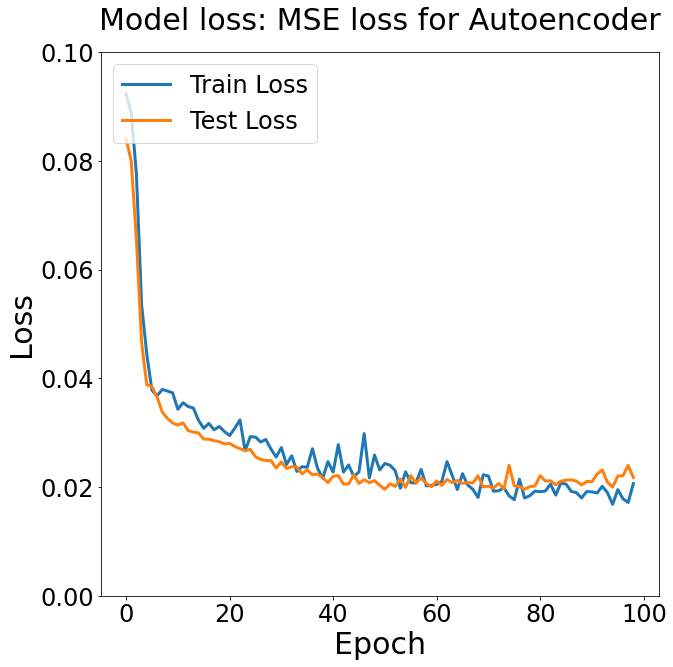

In [10]:
plt.figure(figsize=(10,10))
plt.plot(train_loss, linewidth=3.0)
plt.plot(test_loss, linewidth=3.0)
plt.title('Model loss: MSE loss for Autoencoder',fontsize=30,y=1.03)
plt.ylim(0,0.1)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylabel('Loss',fontsize=30)
plt.xlabel('Epoch',fontsize=30)
plt.legend(['Train Loss', 'Test Loss'], loc='upper left',fontsize=24)
plt.savefig('Loss_plot')

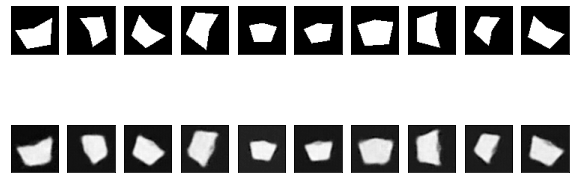

In [12]:
with torch.no_grad():
    for data in test_loader:
        encoded = model.encode(data.x, data.edge_index, data.batch)
        reconstruction = model.decode(encoded)
        break
with torch.no_grad():
    for batch_images in test_images_loader:
        batch_images = batch_images
        break

with torch.no_grad():
    number = 10
    plt.figure(figsize=(10, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(batch_images[index + 20].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index + 20].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()